# Mapas del Agua

## Leer datos

In [1]:
import mapper as Mapper
import mapper_addons as addon
import general_codes as gc
import mapper_data as mapdata
import matplotlib.pyplot as plt
import mapper_colors as mapcol
import os
import pandas as pd

output_path = 'output_plots'
sonora = Mapper.new_map(region = 'sonora')
agua_sonora = sonora.copy()
template = addon.call_template('sonora', 'Prueba')
template_agua = template.copy()
template_name = 'Agua Hermosillo'

water_data = 'data\\agua'
water_years = os.listdir(water_data)

files = {}
paths = {}
for wy in water_years:
    p = os.path.join(water_data, wy)
    paths[wy] = p
    files[wy] = os.listdir(p)

wy = water_years[0]
g = files[wy]
f0 = os.path.join(paths[wy],g[0])

df = pd.read_csv(f0, index_col=0)
df.set_index(df.columns[0], drop=True, inplace=True)
agua_sonora = agua_sonora.join(df)

## Un mapa

c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


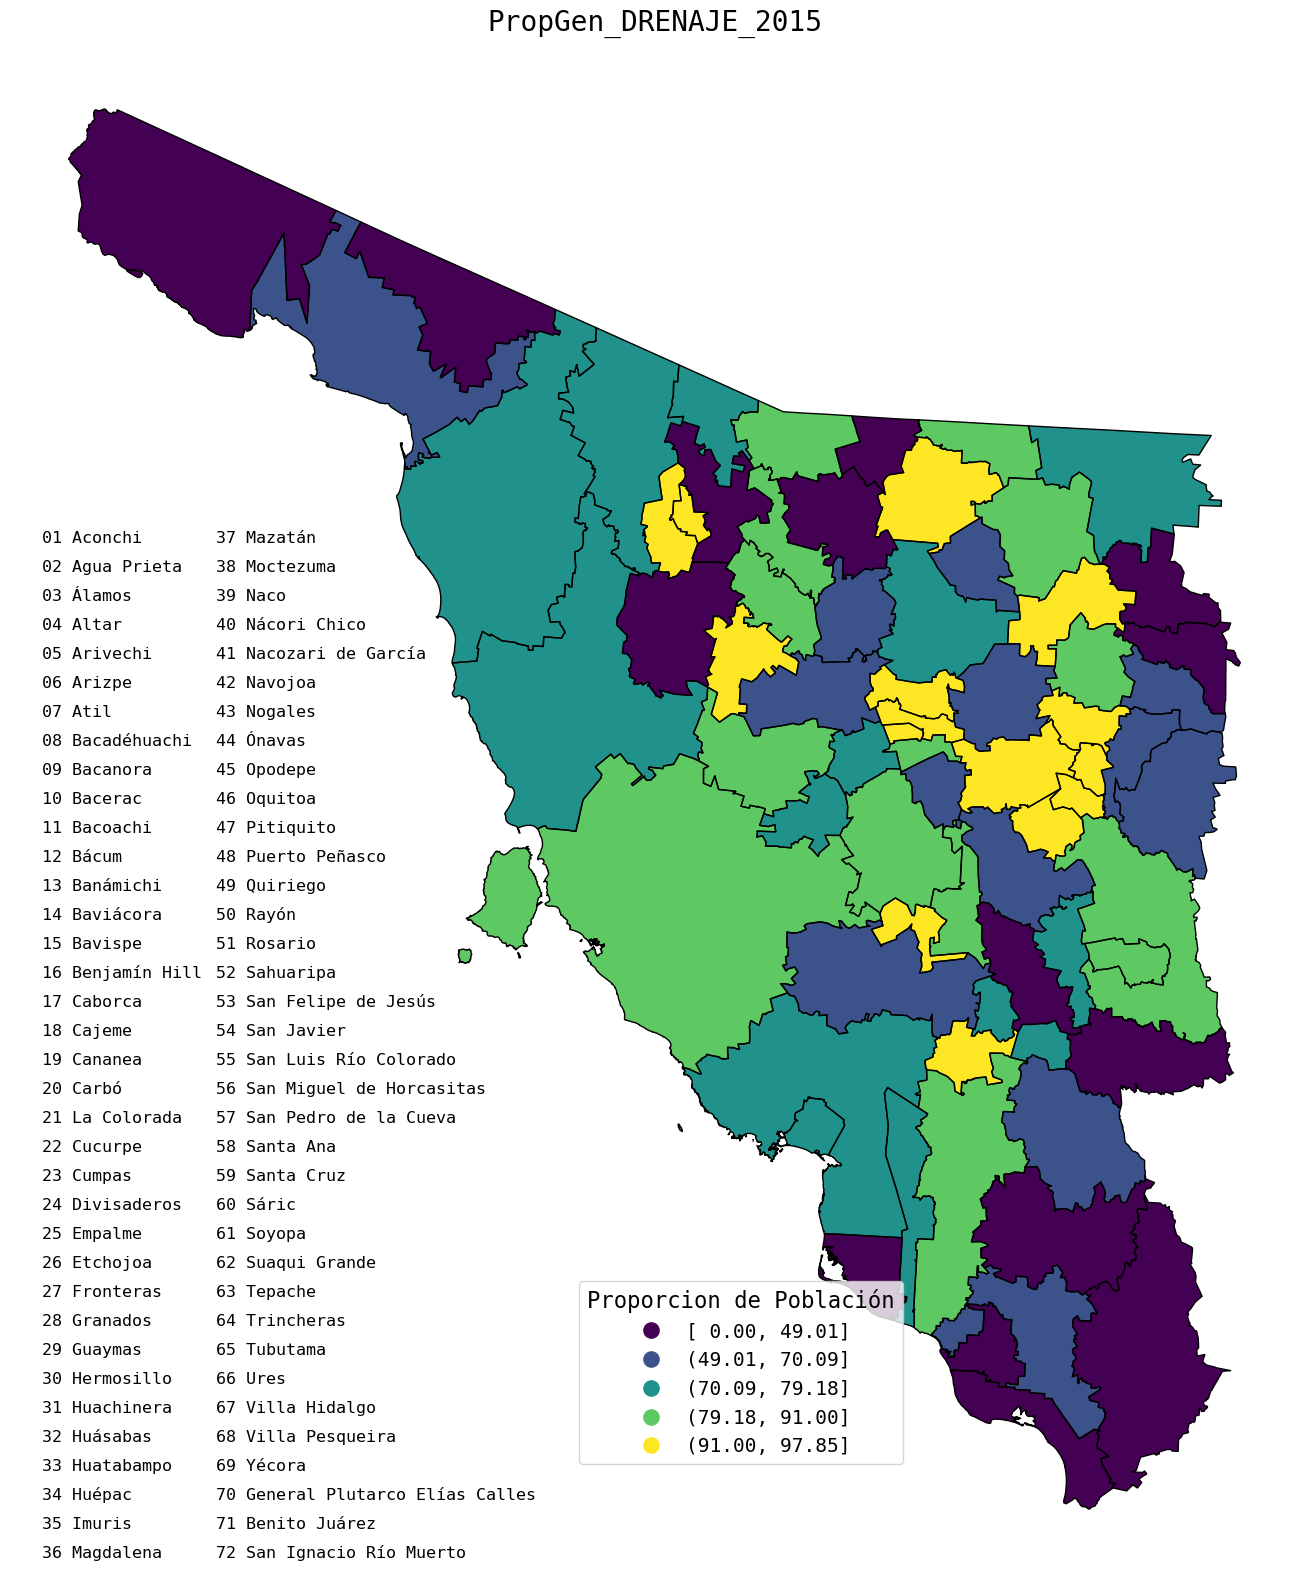

In [2]:

fig, ax = plt.subplots(figsize = (20,20))
agua_sonora.plot(column = '1', ax = ax, scheme = 'quantiles', legend=True, legend_kwds = {
    # 'loc' : 'lower left',
    'title': 'Proporcion de Población',
    'title_fontsize': 16,
    'bbox_to_anchor' : (0.7,0.2),
    'markerscale' : 1.2,
    'fontsize' : 14,
    'interval': True
})
ax.set_title(g[0][:-4], fontsize = 20)
agua_sonora.boundary.plot(color = 'black', lw = 1, ax = ax)
ax.set_axis_off()
mx = 1.25e6
my = 2.1e6
addon.print_regions(agua_sonora.index, [mx, my], ax)

# Todos los mapas.

In [3]:
mun_x = 1.25e6
mun_y = 2.1e6
sep_x = 0.9e5
sep_y = 0.15e5
n_cols = 2

def agua2():
    for wy in water_years:
        for f in files[wy]:
            agua_sonora = sonora.copy()
            f0 = os.path.join(paths[wy],f)
            df = pd.read_csv(f0, index_col=0)
            df.set_index(df.columns[0], drop=True, inplace=True)
            fig, ax = plt.subplots(figsize = (20,20))
            agua_sonora = agua_sonora.join(df)
            agua_data_plots = mapdata.set_data(agua_sonora)
            for n_a, adp in enumerate(agua_data_plots):
                agua_sonora.plot(adp, ax = ax, scheme = 'quantiles', k = 4, legend=True, legend_kwds = {
                    # 'loc' : 'lower left',
                    'title': 'Proporcion de Población',
                    'title_fontsize': 16,
                    'bbox_to_anchor' : (0.6,0.2),
                    'markerscale' : 1.2,
                    'fontsize' : 14,
                    'interval': True
                })
                ax.set_title(f[:-4], fontsize = 20)
                agua_sonora.boundary.plot(color = 'black', lw = 1, ax = ax)
                ax.set_axis_off()
                block = len(agua_sonora.index) // n_cols 
                for k,mun in enumerate(agua_sonora.index):
                    cve = f'0{k+1}' if k+1 <10 else f'{k+1}'
                    text = f'{cve} {mun}'
                    ax.annotate(text=text, xy = (mun_x, mun_y), xytext= (mun_x + k // block * sep_x ,mun_y - k % block *sep_y),
                                fontsize = 12)
                plt.savefig(f'output_plots\\agua\\{f[:-4]}_{n_a}.png')


c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


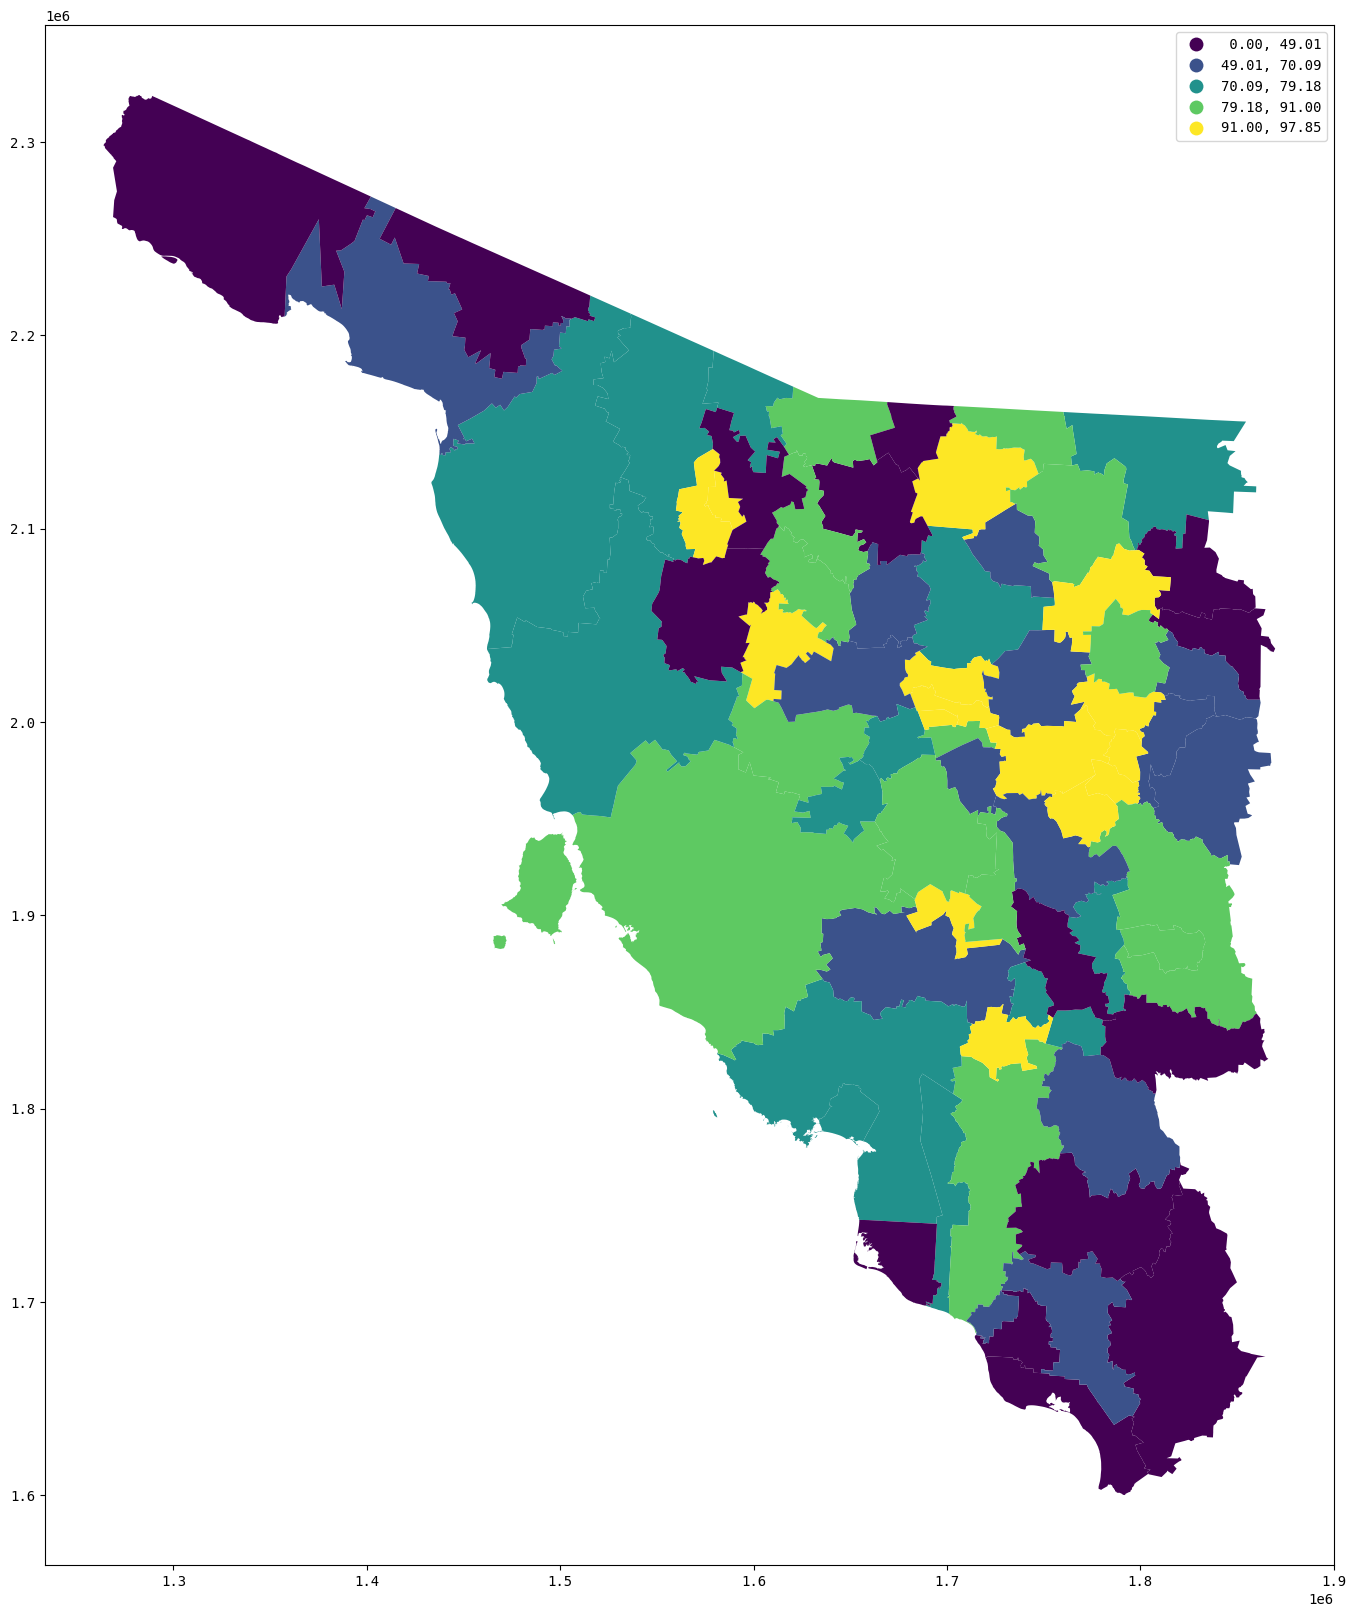

In [4]:
fis, axs = plt.subplots(figsize = (20,20))
agua_sonora.plot('1', scheme = 'quantiles', legend = True, ax = axs)


def agua():
    for wy in water_years:
        for f in files[wy]:
            agua_sonora = sonora.copy()
            f0 = os.path.join(paths[wy],f)
            df = pd.read_csv(f0, index_col=0)
            df.set_index(df.columns[0], drop=True, inplace=True)
            fig, ax = plt.subplots(figsize = (20,20))
            agua_sonora = agua_sonora.join(df)
            agua_data_plots = gc.set_data(agua_sonora)
            for n_a, adp in enumerate(agua_data_plots):
                agua_sonora.plot(adp, ax = ax, scheme = 'quantiles', colormap = 'viridis',legend=True, legend_kwds = {
                    # 'loc' : 'lower left',
                    'title': 'Proporcion de Población',
                    'title_fontsize': 16,
                    'bbox_to_anchor' : (0.6,0.2),
                    'markerscale' : 1.2,
                    'fontsize' : 14,
                    'interval': True
                })
                ax.set_title(f[:-4], fontsize = 20)
                agua_sonora.boundary.plot(color = 'black', lw = 1, ax = ax)
                ax.set_axis_off()
                mun_x = 1.25e6
                mun_y = 2.1e6
                sep_x = 0.9e5
                sep_y = 0.15e5
                n_cols = 2
                block = len(agua_sonora.index) // n_cols 
                for k,mun in enumerate(agua_sonora.index):
                    cve = f'0{k+1}' if k+1<10 else f'{k+1}'
                    text = f'{cve} {mun}'
                    ax.annotate(text=text, xy = (mun_x, mun_y), xytext= (mun_x + k // block * sep_x ,mun_y - k % block *sep_y),
                                fontsize = 12)
                plt.savefig(f'output_plots\\agua\\{f[:-4]}_{n_a}.png')
        


c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


Text(0.5, 1.0, 'Mapa de Sonora')

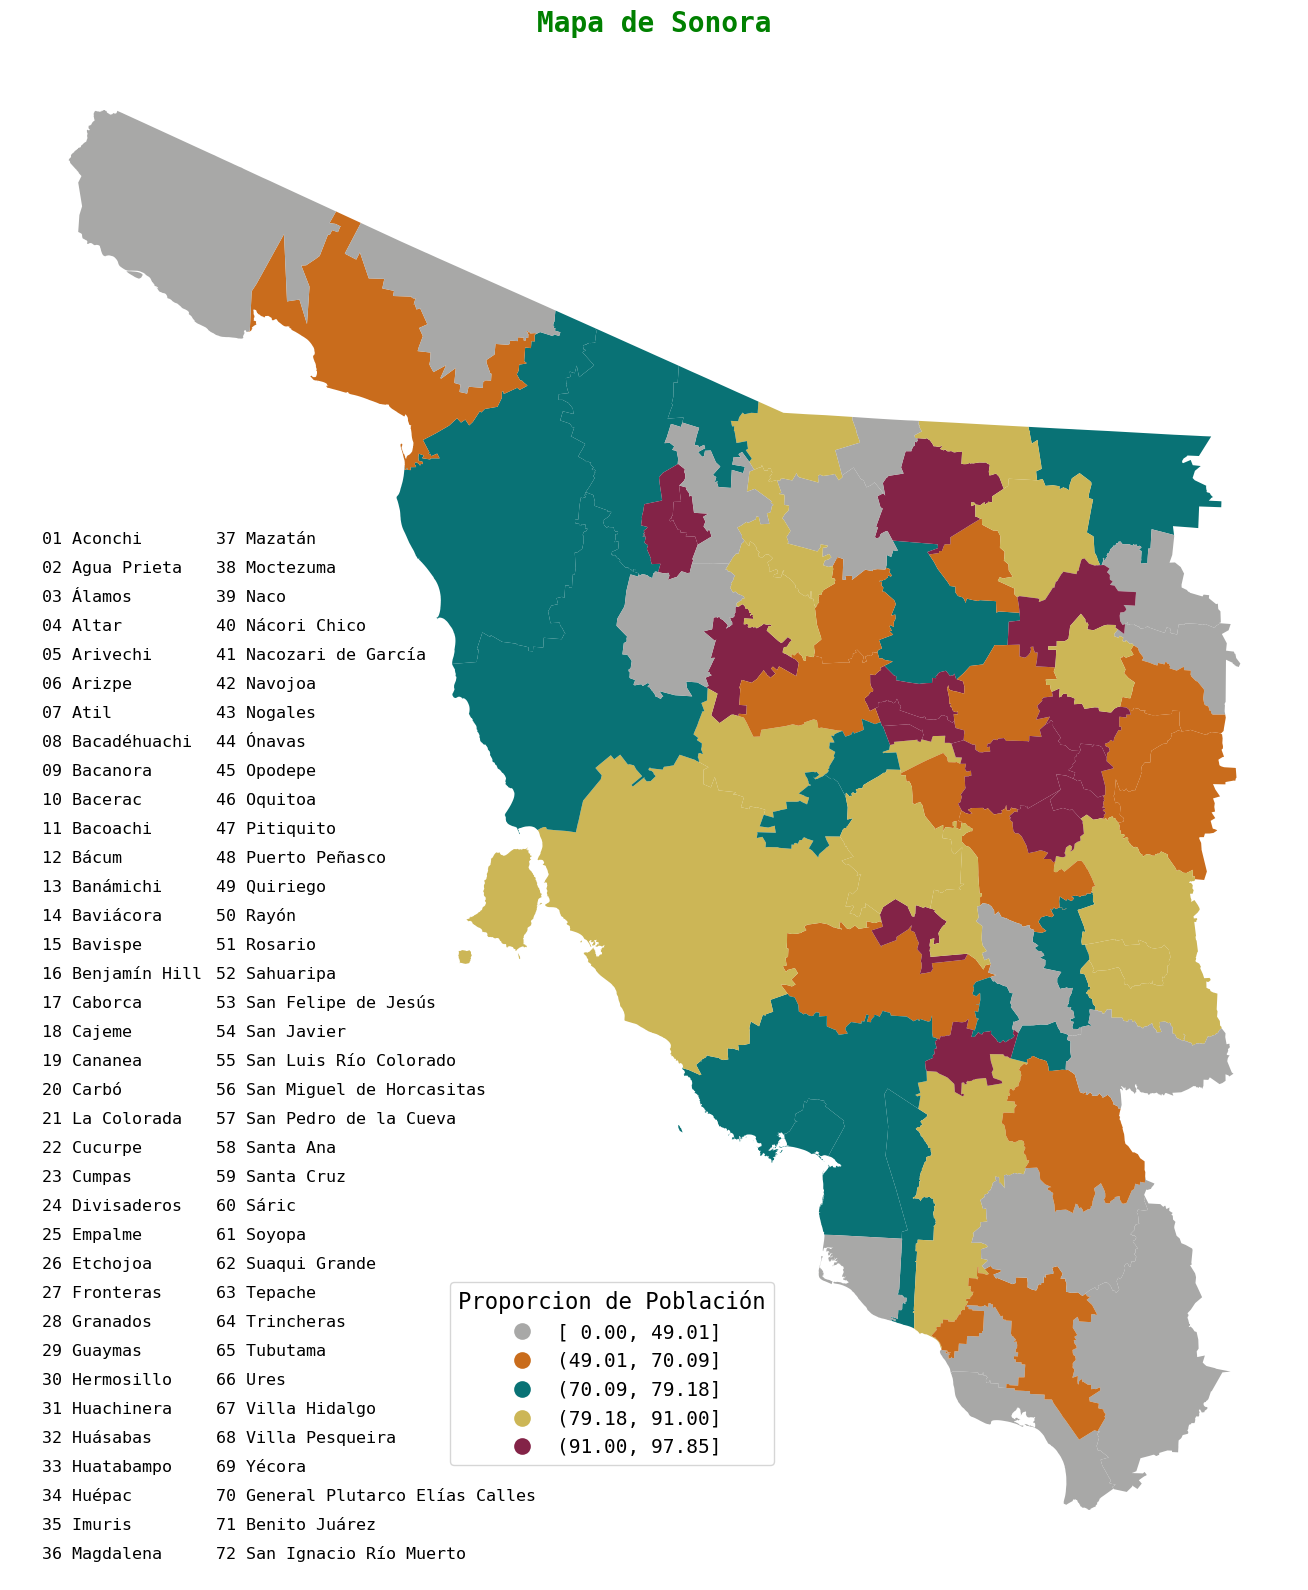

In [5]:

import mapper_gallery as mgal

colors = {0:mgal.isaf_plata,
          1:mgal.isaf_naranja,
          2:mgal.isaf_verde,
          3:mgal.isaf_dorado,
          4:mgal.isaf_guinda}

mplcol = mapcol.custom_cmap(colors)

collll ='1'
fis, axs = plt.subplots(figsize = (20,20))
agua_sonora.plot(collll, scheme = 'quantiles', cmap = mplcol, legend = True, ax =axs, legend_kwds = {
                # 'loc' : 'lower left',
                'title': 'Proporcion de Población',
                'title_fontsize': 16,
                'bbox_to_anchor' : (0.6,0.2),
                'markerscale' : 1.2,
                'fontsize' : 14,
                'interval': True
            })
mx = 1.25e6
my = 2.1e6
addon.print_regions(agua_sonora.index, [mx, my], axs)
axs.set_axis_off()
axs.set_title('Mapa de Sonora', fontsize = 20, color = 'green', weight = 'bold')


{'title': [20, 'black', 'bold', 'Colores Prueba'], '#A8A8A7': [20, '●', 16, 'bold', 'black', '[0.0, 49.01)'], '#C96C1C': [20, '●', 16, 'bold', 'black', '[49.01, 70.09)'], '#097275': [20, '●', 16, 'bold', 'black', '[70.09, 79.18)'], '#CCB656': [20, '●', 16, 'bold', 'black', '[79.18, 91.0)'], '#832347': [20, '●', 16, 'bold', 'black', '[91.0, 97.85]']}


c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\Users\Tamara\anaconda3\envs\ISAF\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


Text(0.5, 1.0, 'Mapa de Sonora')

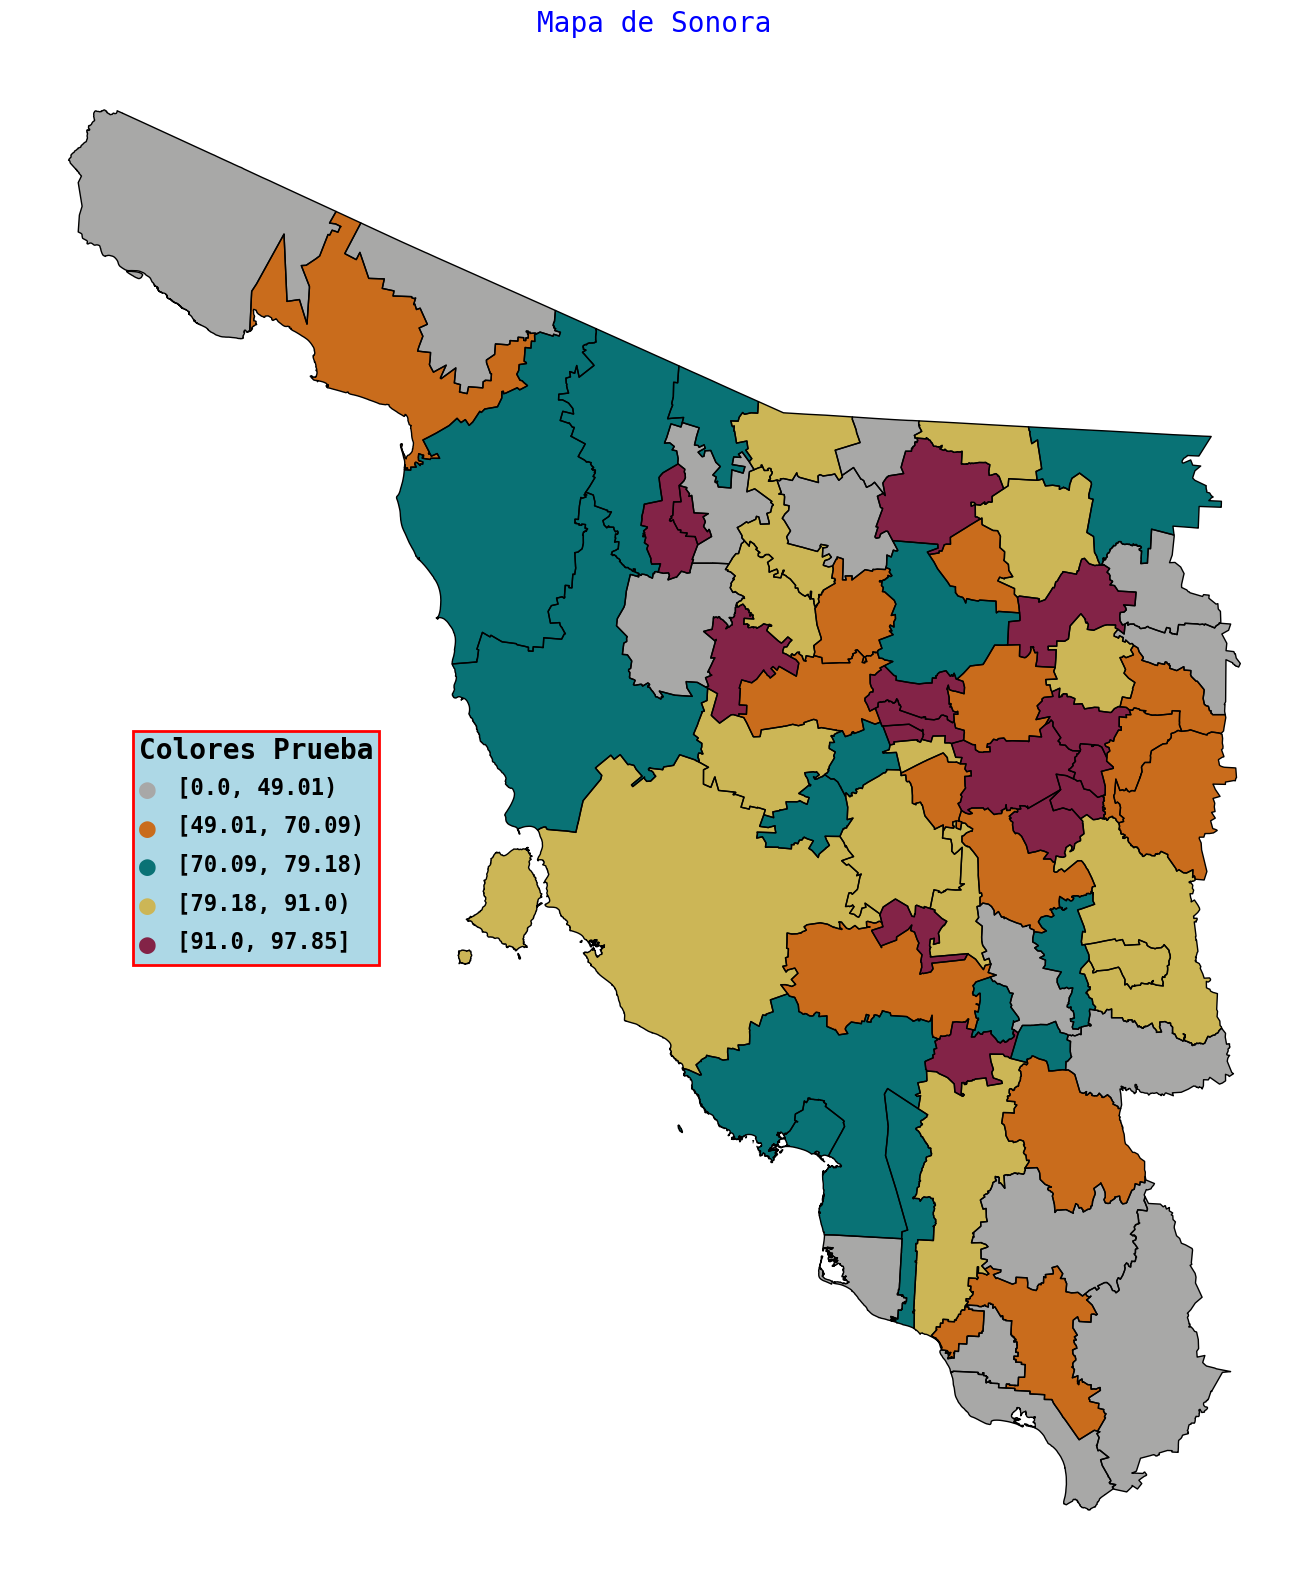

In [12]:
fig1, axs = plt.subplots(figsize = (20,20))
addon.legend_by_data(agua_sonora, '1', axs, legend_xy = [1.3e6, 2e6],
                     legend_format = {
                        'title': [20, 'black', 'bold', 'Colores Prueba'],
                        0: [20, '●', 16, 'bold', 'black', 'Aereo'],
                        1: [20, '●', 16, 'bold', 'black', 'Terrestre'],
                        2: [20, '●', 16, 'bold', 'black', 'Maritimo'],
                        3: [20, '●', 16, 'bold', 'black', 'Maritimo_Terrestre'],
                        4: [20, '●', 16, 'bold', 'black', 'Maritimo_Aereo'],
                        },
                        data = {
                        'scheme': 'quantiles',
                        'colors': {0:mgal.isaf_plata,
                                   1:mgal.isaf_naranja,
                                   2:mgal.isaf_verde,
                                   3:mgal.isaf_dorado,
                                   4:mgal.isaf_guinda},
                        'interval': True
                        })
agua_sonora.boundary.plot(lw = 1, color = 'black', ax = axs)
axs.set_axis_off()
axs.set_title('Mapa de Sonora', fontsize = 20, color = 'blue')

In [7]:
test = addon.call_template('sonora', 'Prueba')
muns = test.index

test.head(n = 2)

,texto,color_relleno,bd,axis,texto_x,texto_y,flecha_x,flecha_y,flecha,flecha_conf,...,title_conf,data,legend_colors,legend_names,legend_config,legend_x,legend_y,legend_border_corner1,legend_border_dims,legend_border_style
NOMGEO,,,,,,,,,,,,,,,,,,,,,
Aconchi,1,purple,"1,blue,1",0,1.693000e+06,1.990000e+06,1800000,2000000,0,"0.5,black,1,2",...,"20,black,None",34.190231,purple,Extras,"14,black,None",1.3,1.7,"1290000,1720000","110000,-100000","1,red,x,14,-,2"
Agua Prieta,2,green,"1,blue,1",0,1.811330e+06,2.132136e+06,1800000,2000000,0,"0.5,black,1,2",...,"20,black,None",43.871326,green,Mayor del 30%,"14,black,None",NaN,NaN,"1290000,1720000","110000,-100000","1,red,x,14,-,2"


In [8]:
p = [20, 'black', 'bold', 'Colores Prueba']

def list_to_str(lista):
    st = ''
    for s in lista:
        st += f'{s},' if type(s) == int else f'{s},'
    return st[:-1]
g = {
                        'title': [20, 'black', 'bold', 'Colores Prueba'],
                        0: [20, '●', 16, 'bold', 'black', 'Aereo'],
                        1: [20, '●', 16, 'bold', 'black', 'Terrestre'],
                        2: [20, '●', 16, 'bold', 'black', 'Maritimo'],
                        3: [20, '●', 16, 'bold', 'black', 'Maritimo_Terrestre'],
                        4: [20, '●', 16, 'bold', 'black', 'Maritimo_Aereo'],
                        }
def dict_to_template(dicc: dict, template, cols, **kwargs):
    sk_rows = kwargs.get('skip_rows', 1)
    lk = list(dicc.keys())
    for k in range(len(dicc.keys())):
            if type(dicc[lk[k]]) == list:
                template.iloc[k + sk_rows, cols] = [lk[k], list_to_str(dicc[lk[k]])]
            else:  
                template.iloc[k + sk_rows, cols] = [lk[k], dicc[lk[k]]]

new_template = pd.DataFrame(index = muns)
new_template['texto'] = [f'0{i}' if i<10 else f'{i}' for i in range(1,73)]
new_template['data'] = agua_sonora['1']
new_template['bd'] = '1,blue,1'
new_template['axis'] = 0
new_template['texto_x'] = test['texto_x']
new_template['texto_y'] = test['texto_y']
new_template['flecha_x'] = test['flecha_x']
new_template['flecha_y'] = test['flecha_y']
new_template['flecha'] = 0
new_template['title'] = 'Mapa de Sonora'
new_template['title_conf'] = test['title_conf']
new_template['legend_order'] = pd.NA
new_template['legend_color'] = pd.NA
new_template['legend_text'] = pd.NA
new_template.loc['Aconchi',['legend_order', 'legend_color', 'legend_text']] = ['quantiles',5, 1]
new_template['legend_config'] = list_to_str(p)
s = {0:mgal.isaf_plata,
                                   1:mgal.isaf_naranja,
                                   2:mgal.isaf_verde,
                                   3:mgal.isaf_dorado,
                                   4:mgal.isaf_guinda}

dict_to_template(s, new_template, [11,12])
gs = {list(g.keys())[i + 1]: g[list(g.keys())[i + 1]] for i in range(len(g.keys()) - 1)}
dict_to_template(gs, new_template, [11, 13])

new_template.head(n = 7)



,texto,data,bd,axis,texto_x,texto_y,flecha_x,flecha_y,flecha,title,title_conf,legend_order,legend_color,legend_text,legend_config
NOMGEO,,,,,,,,,,,,,,,
Aconchi,01,79.727891,"1,blue,1",0,1.693000e+06,1.990000e+06,1800000,2000000,0,Mapa de Sonora,"20,black,None",quantiles,5,1,"20,black,bold,Colores Prueba"
Agua Prieta,02,78.351917,"1,blue,1",0,1.811330e+06,2.132136e+06,1800000,2000000,0,Mapa de Sonora,"20,black,None",0,#A8A8A7,"20,●,16,bold,black,Aereo","20,black,bold,Colores Prueba"
Álamos,03,32.863527,"1,blue,1",0,1.820431e+06,1.682062e+06,1800000,2000000,0,Mapa de Sonora,"20,black,None",1,#C96C1C,"20,●,16,bold,black,Terrestre","20,black,bold,Colores Prueba"
Altar,04,76.262626,"1,blue,1",0,1.551269e+06,2.155609e+06,1800000,2000000,0,Mapa de Sonora,"20,black,None",2,#097275,"20,●,16,bold,black,Maritimo","20,black,bold,Colores Prueba"
Arivechi,05,88.186813,"1,blue,1",0,1.800000e+06,1.882000e+06,1800000,2000000,0,Mapa de Sonora,"20,black,None",3,#CCB656,"20,●,16,bold,black,Maritimo_Terrestre","20,black,bold,Colores Prueba"
Arizpe,06,78.121284,"1,blue,1",0,1.712119e+06,2.060253e+06,1800000,2000000,0,Mapa de Sonora,"20,black,None",4,#832347,"20,●,16,bold,black,Maritimo_Aereo","20,black,bold,Colores Prueba"
Atil,07,96.511628,"1,blue,1",0,1.580000e+06,2.110000e+06,1800000,2000000,0,Mapa de Sonora,"20,black,None",<NA>,<NA>,<NA>,"20,black,bold,Colores Prueba"


KeyError: 'color_relleno'

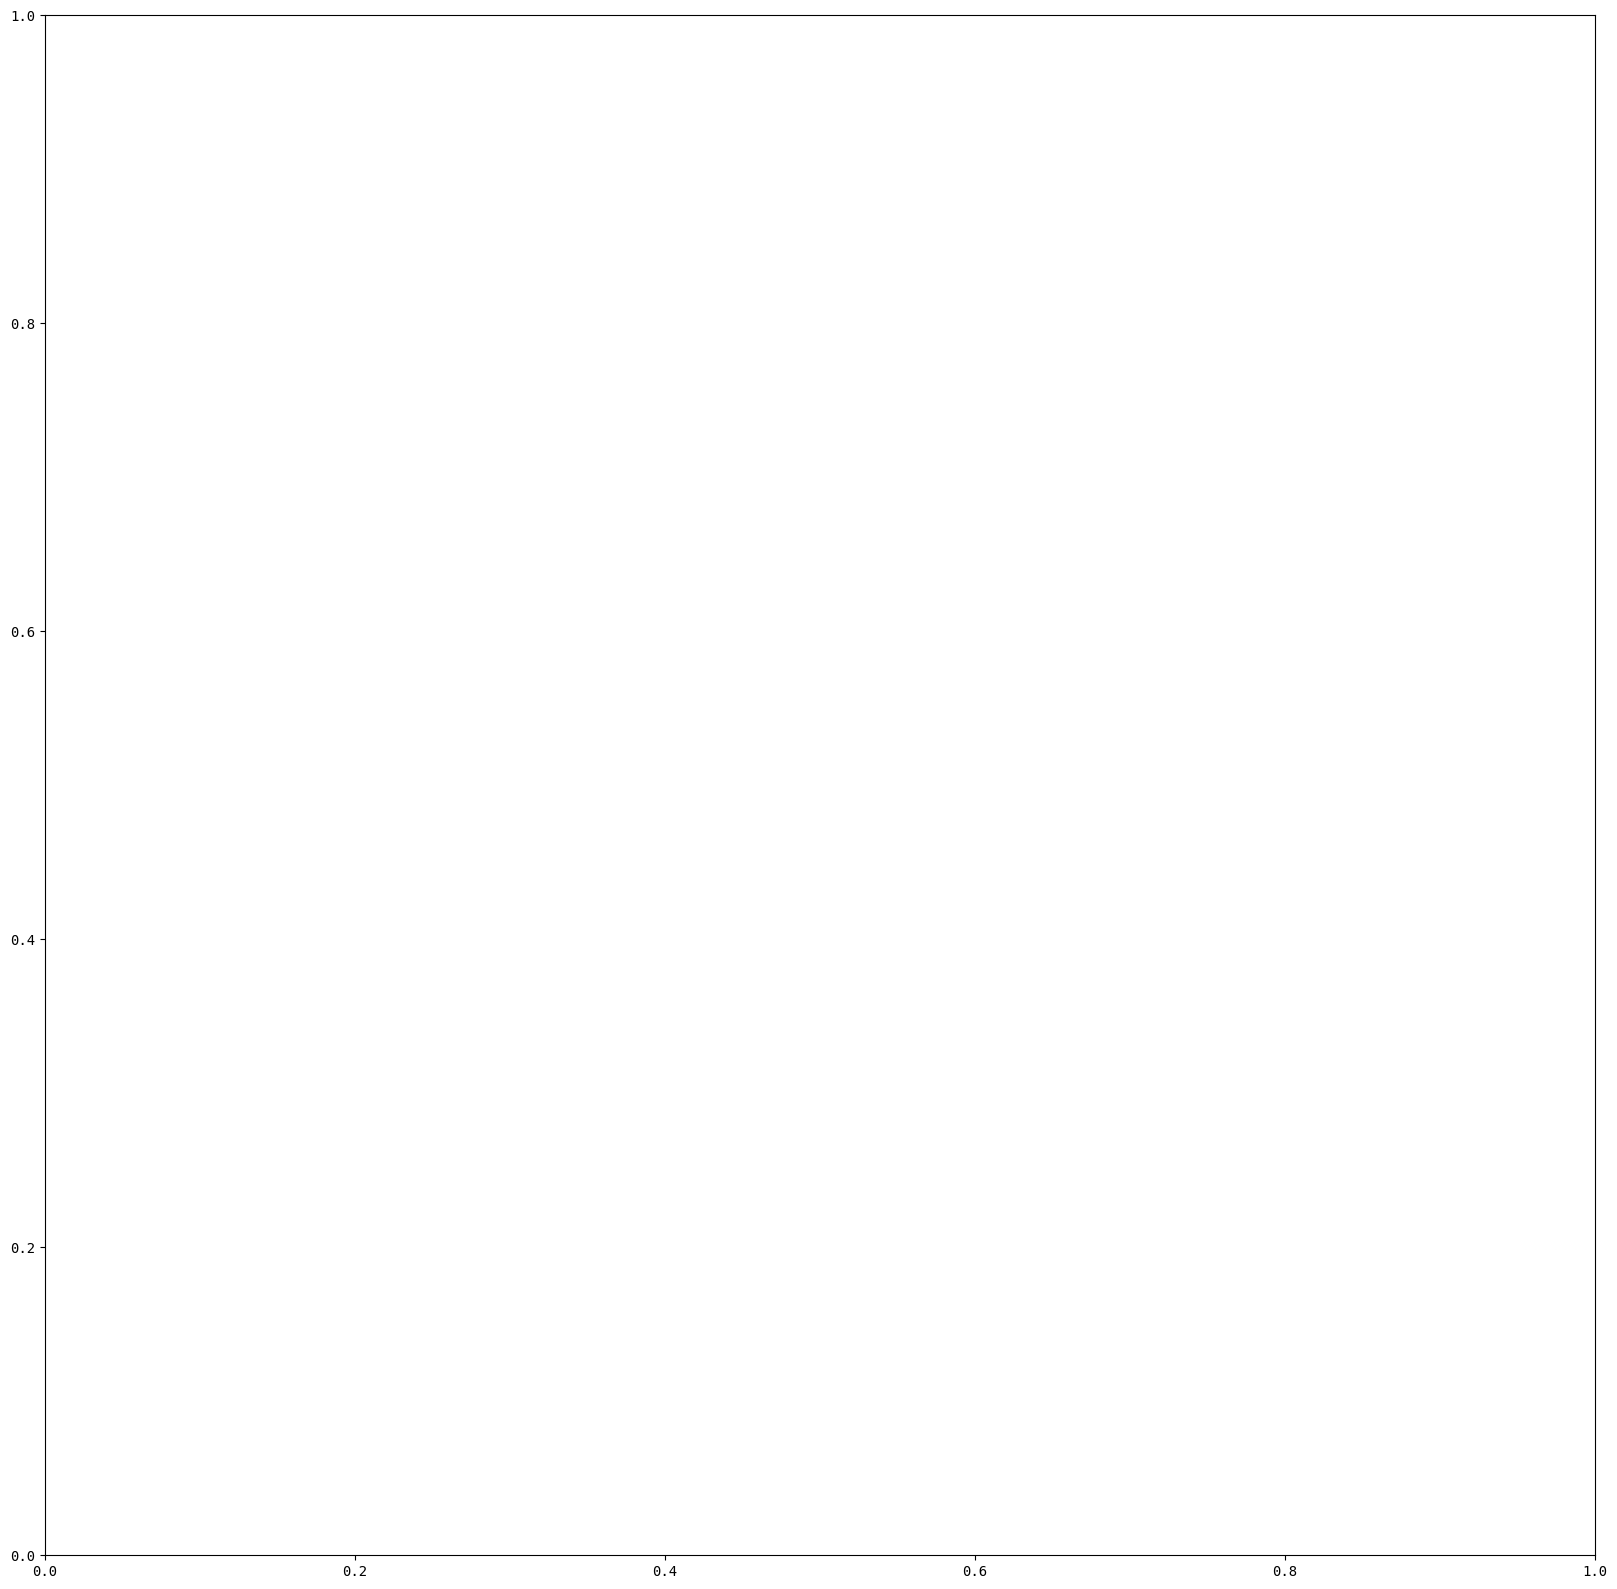

In [9]:

def read_template(map, template, ax):
    color_t = template['color_relleno']
    map.plot(color = color_t, ax = ax)
    ib_0 = list(template.index)[0]
    title = template.loc[ib_0,'title']
    title_config = gc.text_to_list(template.loc[ib_0,'title_conf'])
    fw = title_config[2] if title_config[2]!= 'None' else None
    ax.set_title(title,
                 fontsize = title_config[0], color = title_config[1], weight = fw)
    ac_bd = template.loc[ib_0,'bd']
    for reg in template.index:
        t_x = template.loc[reg, 'texto_x']
        t_y = template.loc[reg, 'texto_y']
        f_x = template.loc[reg, 'flecha_x']
        f_y = template.loc[reg, 'flecha_y']
        t_coords = (t_x, t_y)
        f_coords = (f_x, f_y)
        flecha = template.loc[reg, 'flecha']
        text_cfig = template.loc[reg, 'text_conf']
        text_cfig = gc.text_to_list(text_cfig)
        if flecha:
            flecha_sets = template.loc[reg, 'flecha_conf']
            flecha_sets = gc.text_to_list(flecha_sets, ntype = float)
            addon.arrow_block(template.loc[reg,'texto'], f_coords, t_coords, flecha_sets, ax,
                        text_cf = text_cfig)
        else:
            addon.text_block(template.loc[reg,'texto'], t_coords, ax,
                       text_cf = text_cfig)
    if int(ac_bd[0]):
        bd = gc.text_to_list(template.loc[ib_0,'bd'])
        map.boundary.plot(color = bd[1], lw = bd[2], ax = ax)
    if not template.loc[ib_0, 'axis']:
        ax.set_axis_off()
    return 0

fig, ax = plt.subplots(figsize = (20,20))
read_template(sonora, new_template, ax)
